In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [50]:
Fraud=pd.read_csv('Fraud_check.csv')

In [51]:
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [52]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [53]:
Fraud['Status']='R'
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,R
1,YES,Divorced,33700,134075,18,YES,R
2,NO,Married,36925,160205,30,YES,R
3,YES,Single,50190,193264,15,YES,R
4,NO,Married,81002,27533,28,NO,R
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,R
596,YES,Divorced,69967,55369,2,YES,R
597,NO,Divorced,47334,154058,0,YES,R
598,YES,Married,98592,180083,17,NO,R


In [54]:
Fraud.loc[Fraud["Taxable.Income"]>=30000,"Status"]="Good"
Fraud.loc[Fraud["Taxable.Income"]<30000,"Status"]="Risky"

In [55]:
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [56]:
Fraud.Status.unique()

array(['Good', 'Risky'], dtype=object)

In [57]:
#Dropping "Taxable.Income" column
Fraud=Fraud.drop(['Taxable.Income'],axis=1)

In [58]:
Fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Status
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [ ]:
#Apply Label encoding on categorical data

In [59]:
label_encoder = preprocessing.LabelEncoder()
Fraud['Undergrad']= label_encoder.fit_transform(Fraud['Undergrad'])
Fraud['Marital.Status']= label_encoder.fit_transform(Fraud['Marital.Status']) 
Fraud['Urban']= label_encoder.fit_transform(Fraud['Urban']) 
Fraud['Status']= label_encoder.fit_transform(Fraud['Status']) 

In [60]:
Fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [61]:
Fraud.Status.unique()

array([0, 1])

In [62]:
X=Fraud.iloc[:,:-1]

In [18]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [63]:
Y=Fraud.iloc[:,-1:]

In [20]:
Y

,Status
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [ ]:
#Building tree classfier using Entropy without giving the depth value

In [65]:
model1 = DecisionTreeClassifier(criterion = 'entropy')
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

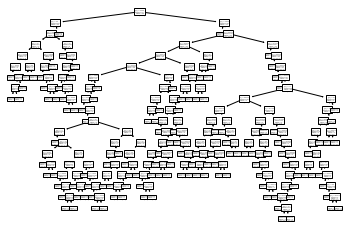

In [66]:
#PLot the decision tree
tree.plot_tree(model1);

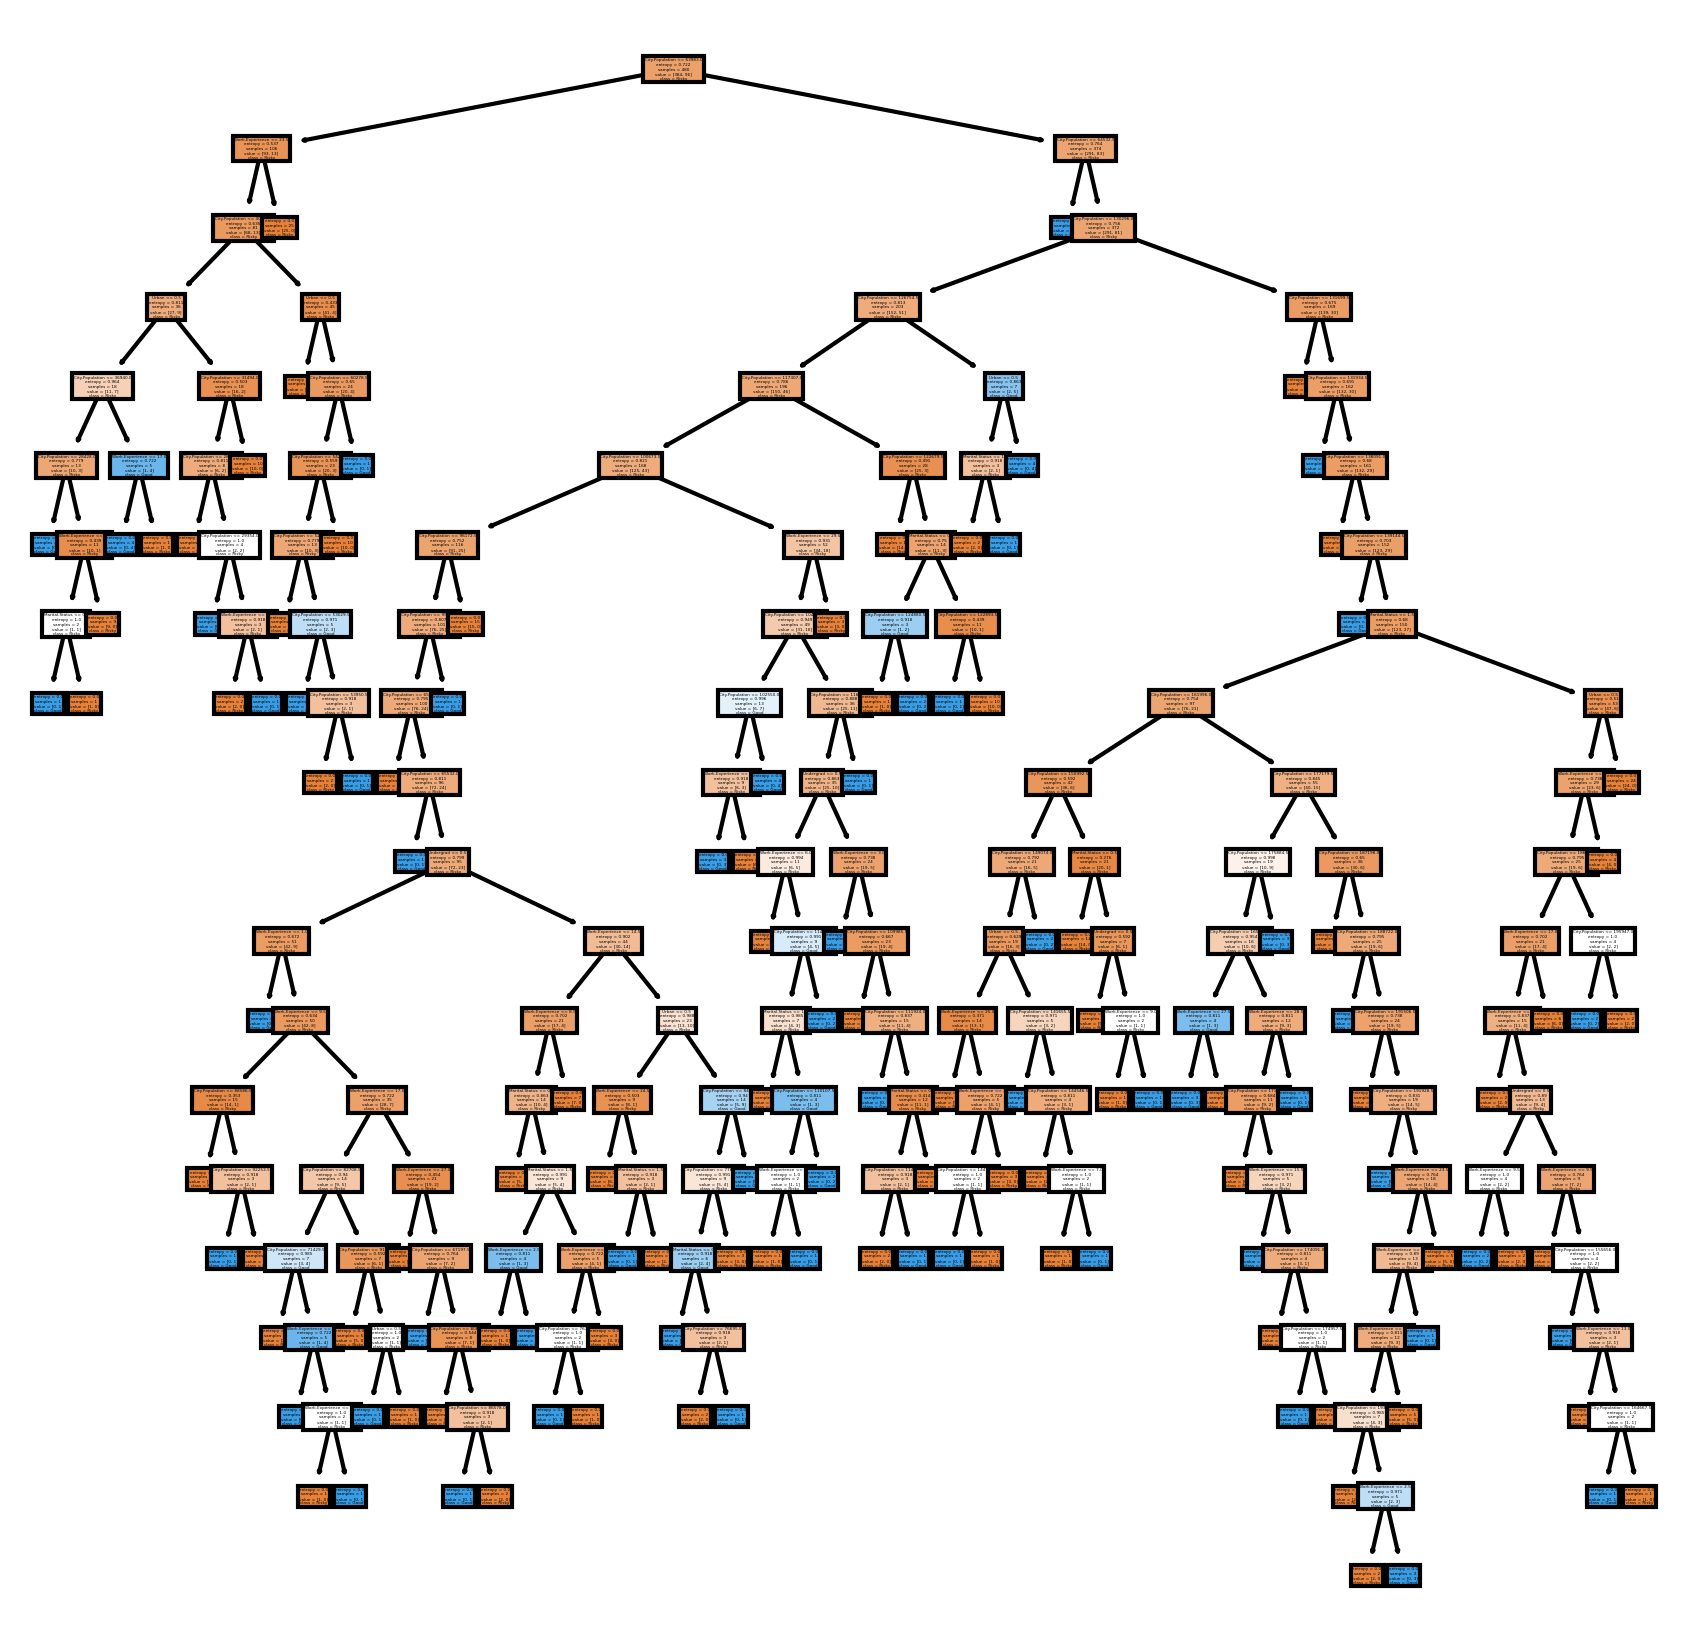

In [67]:
import matplotlib.pyplot as plt
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'] 
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [ ]:
#prediction1

In [47]:
preds1=model1.predict(x_test)

In [48]:
preds

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [45]:
y_test

,Status
159,0
307,0
253,0
528,0
137,1
...,...
102,0
577,0
18,0
560,0


In [68]:
y_test_array=np.asarray(y_test,dtype=np.int)
y_test_array

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [46]:
pd.Series(preds).value_counts() # getting the count of each category 

0    98
1    22
dtype: int64

In [40]:
pd.crosstab(preds,y_test)

ValueError: Shape of passed values is (1, 2), indices imply (120, 2)

In [41]:
#confusion matrix
pd.crosstab(y_test,preds) 

ValueError: Shape of passed values is (1, 2), indices imply (120, 2)

In [69]:
preds1=model1.predict(x_test)
np.mean(preds1==y_test_array) 

0.66

In [ ]:
##Model2 Building tree classfier using Entropy with depth vale of 5

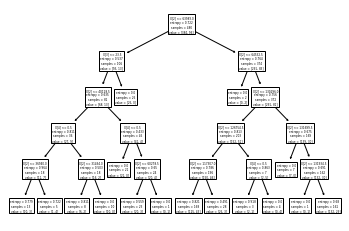

In [70]:
model2 = DecisionTreeClassifier(criterion ='entropy',max_depth=5)#Max_depth is tree size
model2.fit(x_train,y_train)
#PLot the decision tree
tree.plot_tree(model2);

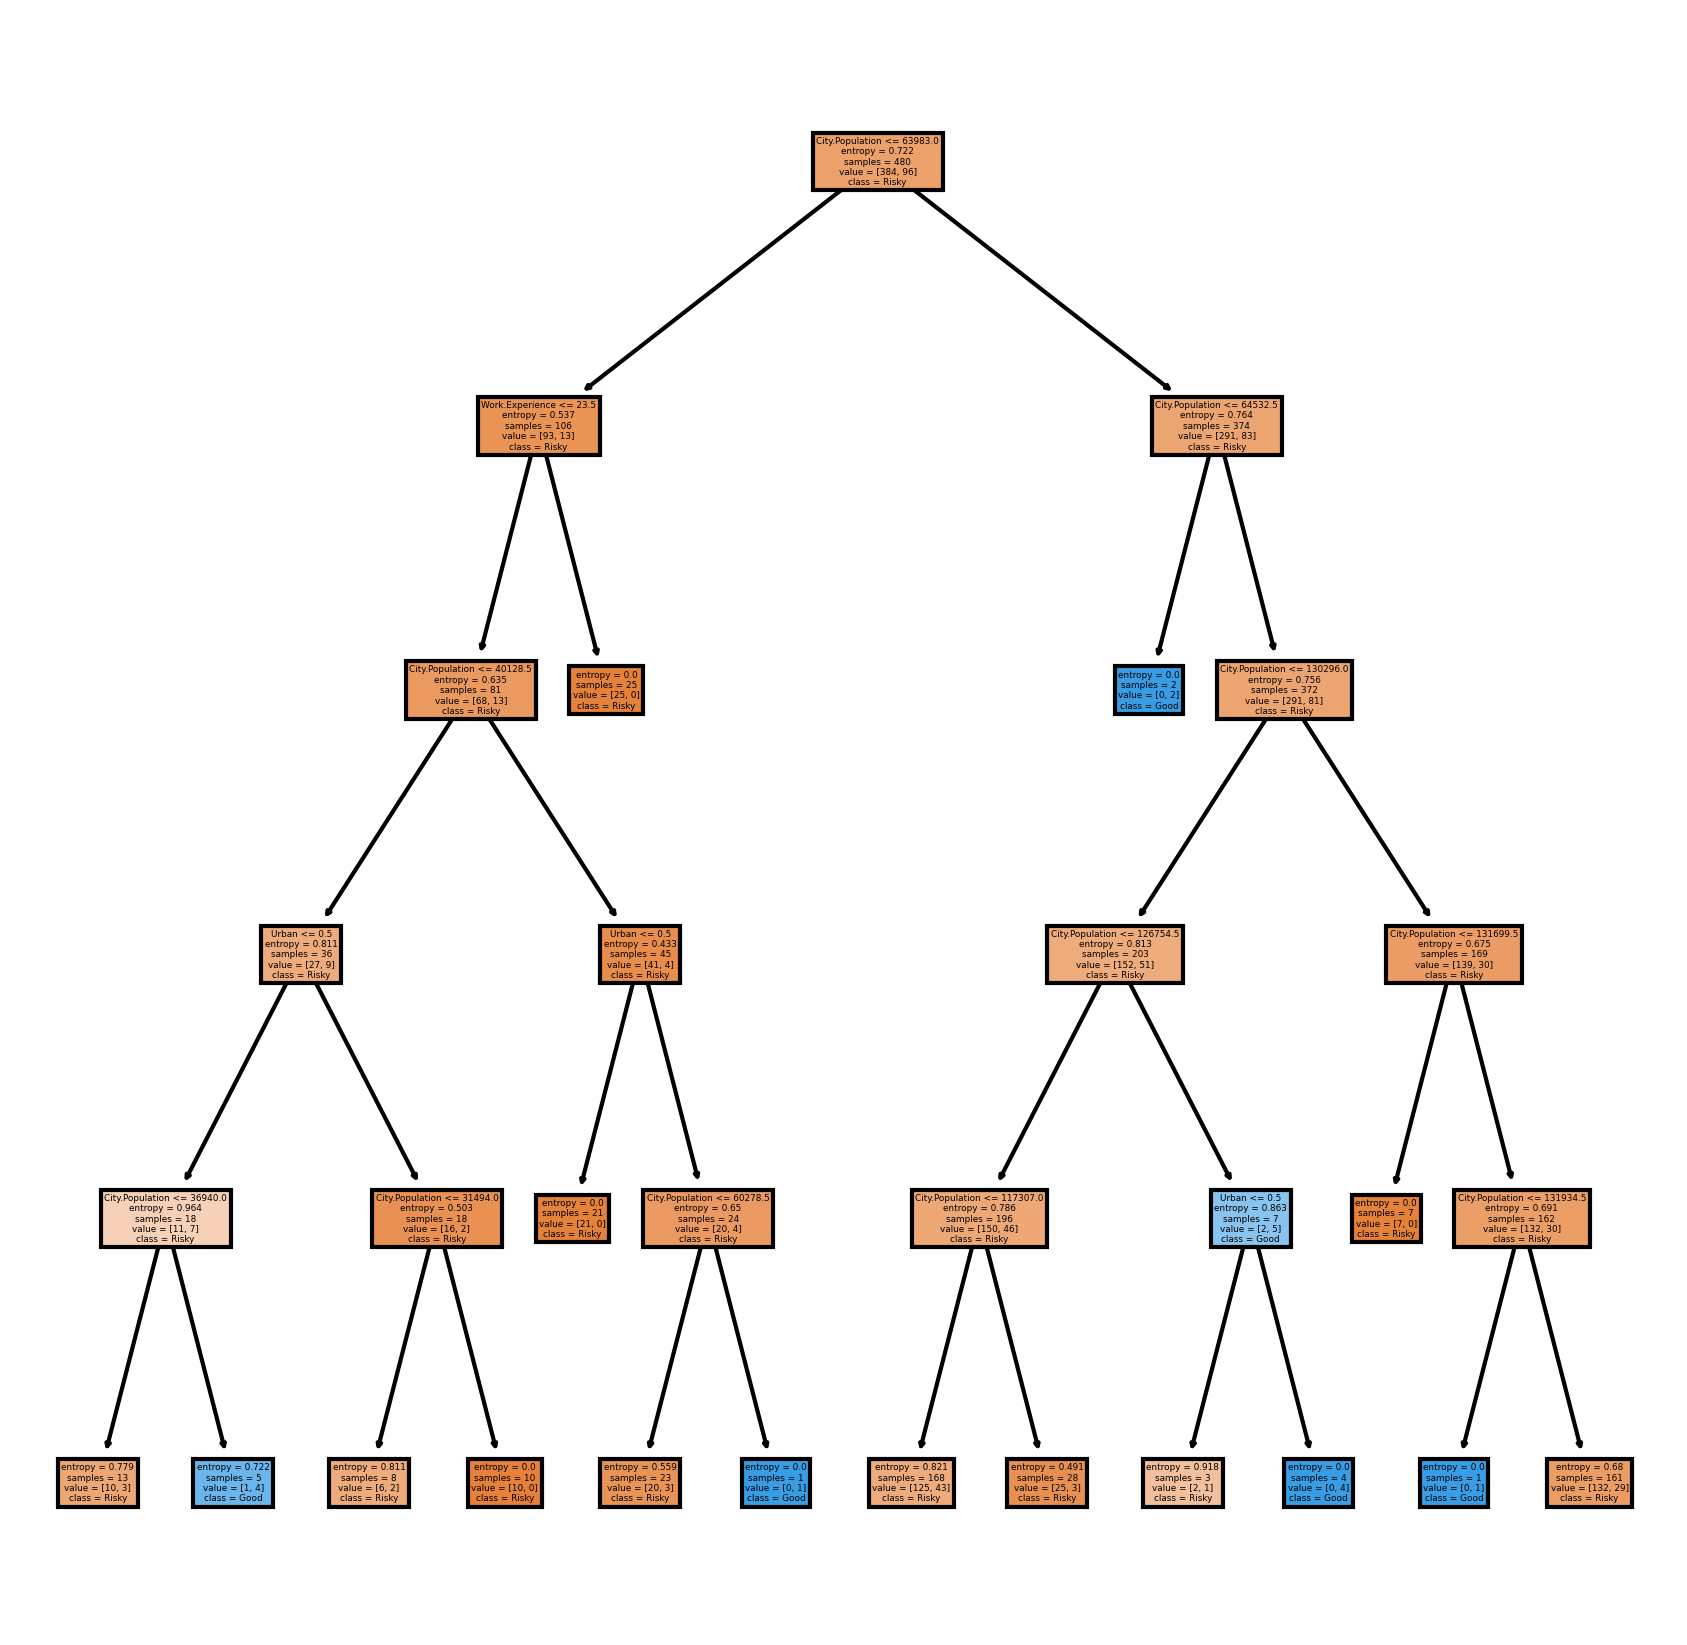

In [71]:
import matplotlib.pyplot as plt
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'] 
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [72]:
#prediction2
preds2=model2.predict(x_test)

In [74]:
np.mean(preds2==y_test_array) 

0.7533333333333333

In [ ]:
##Model3 Building tree classfier using Entropy with depth vale of 6

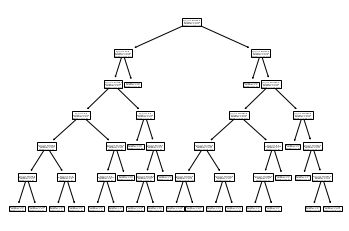

In [75]:
model3 = DecisionTreeClassifier(criterion ='entropy',max_depth=6)#Max_depth is tree size
model3.fit(x_train,y_train)
#PLot the decision tree
tree.plot_tree(model3);

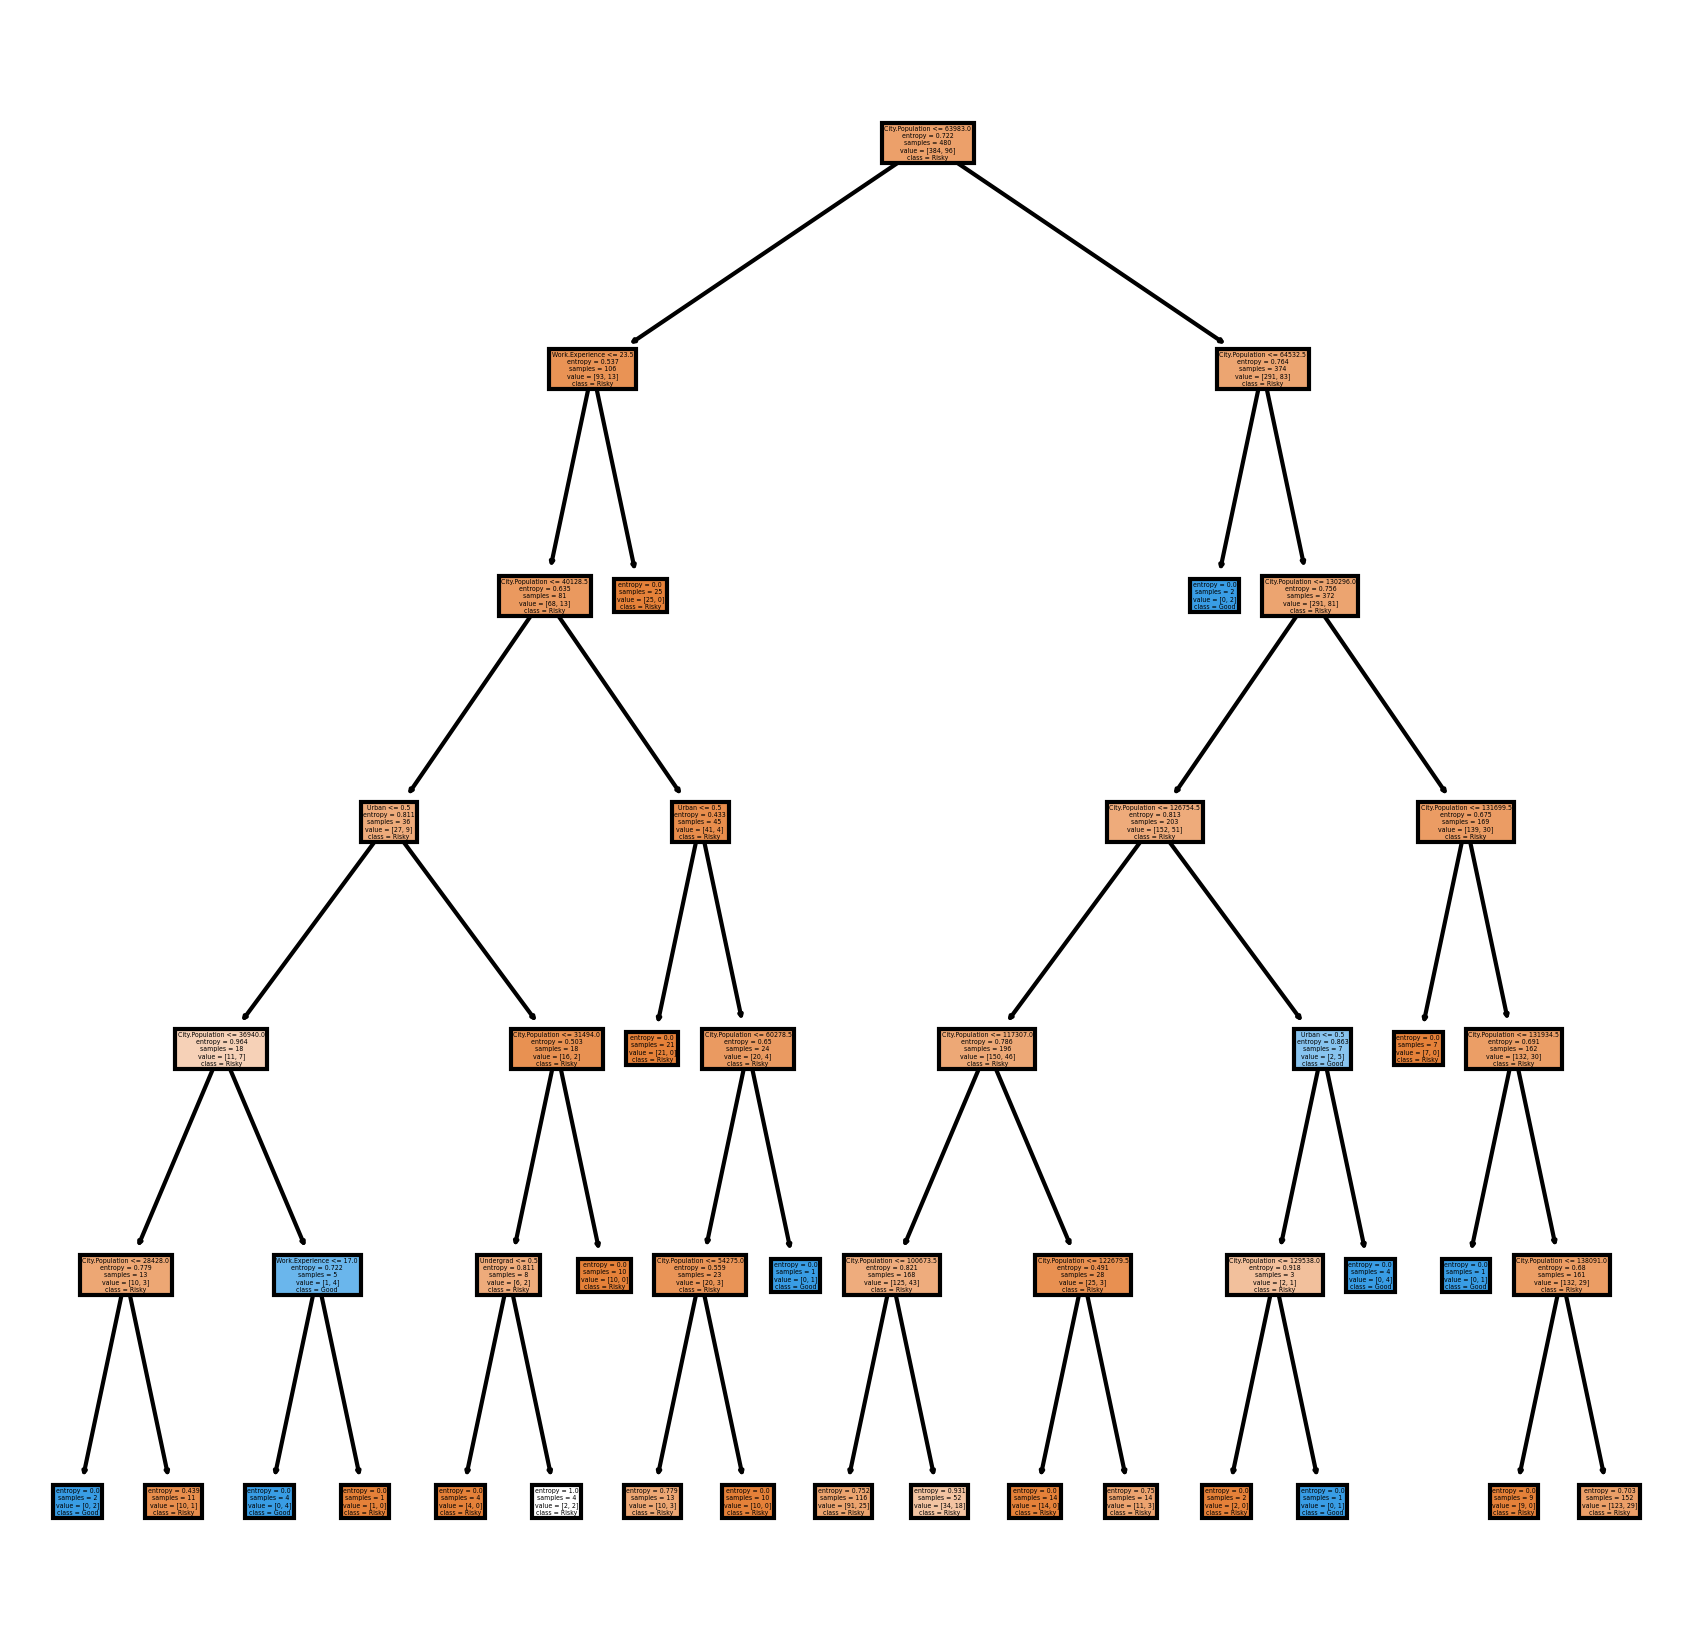

In [76]:
import matplotlib.pyplot as plt
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'] 
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(model3,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [77]:
#prediction3
preds3=model3.predict(x_test)

In [79]:
np.mean(preds3==y_test_array) 

0.7488888888888889

In [ ]:
##Model4 Building tree classfier using Entropy with depth vale of 7

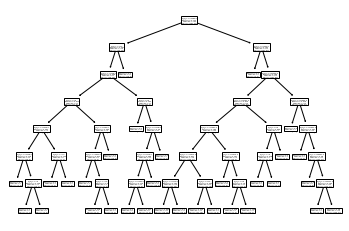

In [80]:
model4 = DecisionTreeClassifier(criterion ='entropy',max_depth=7)#Max_depth is tree size
model4.fit(x_train,y_train)
#PLot the decision tree
tree.plot_tree(model4);

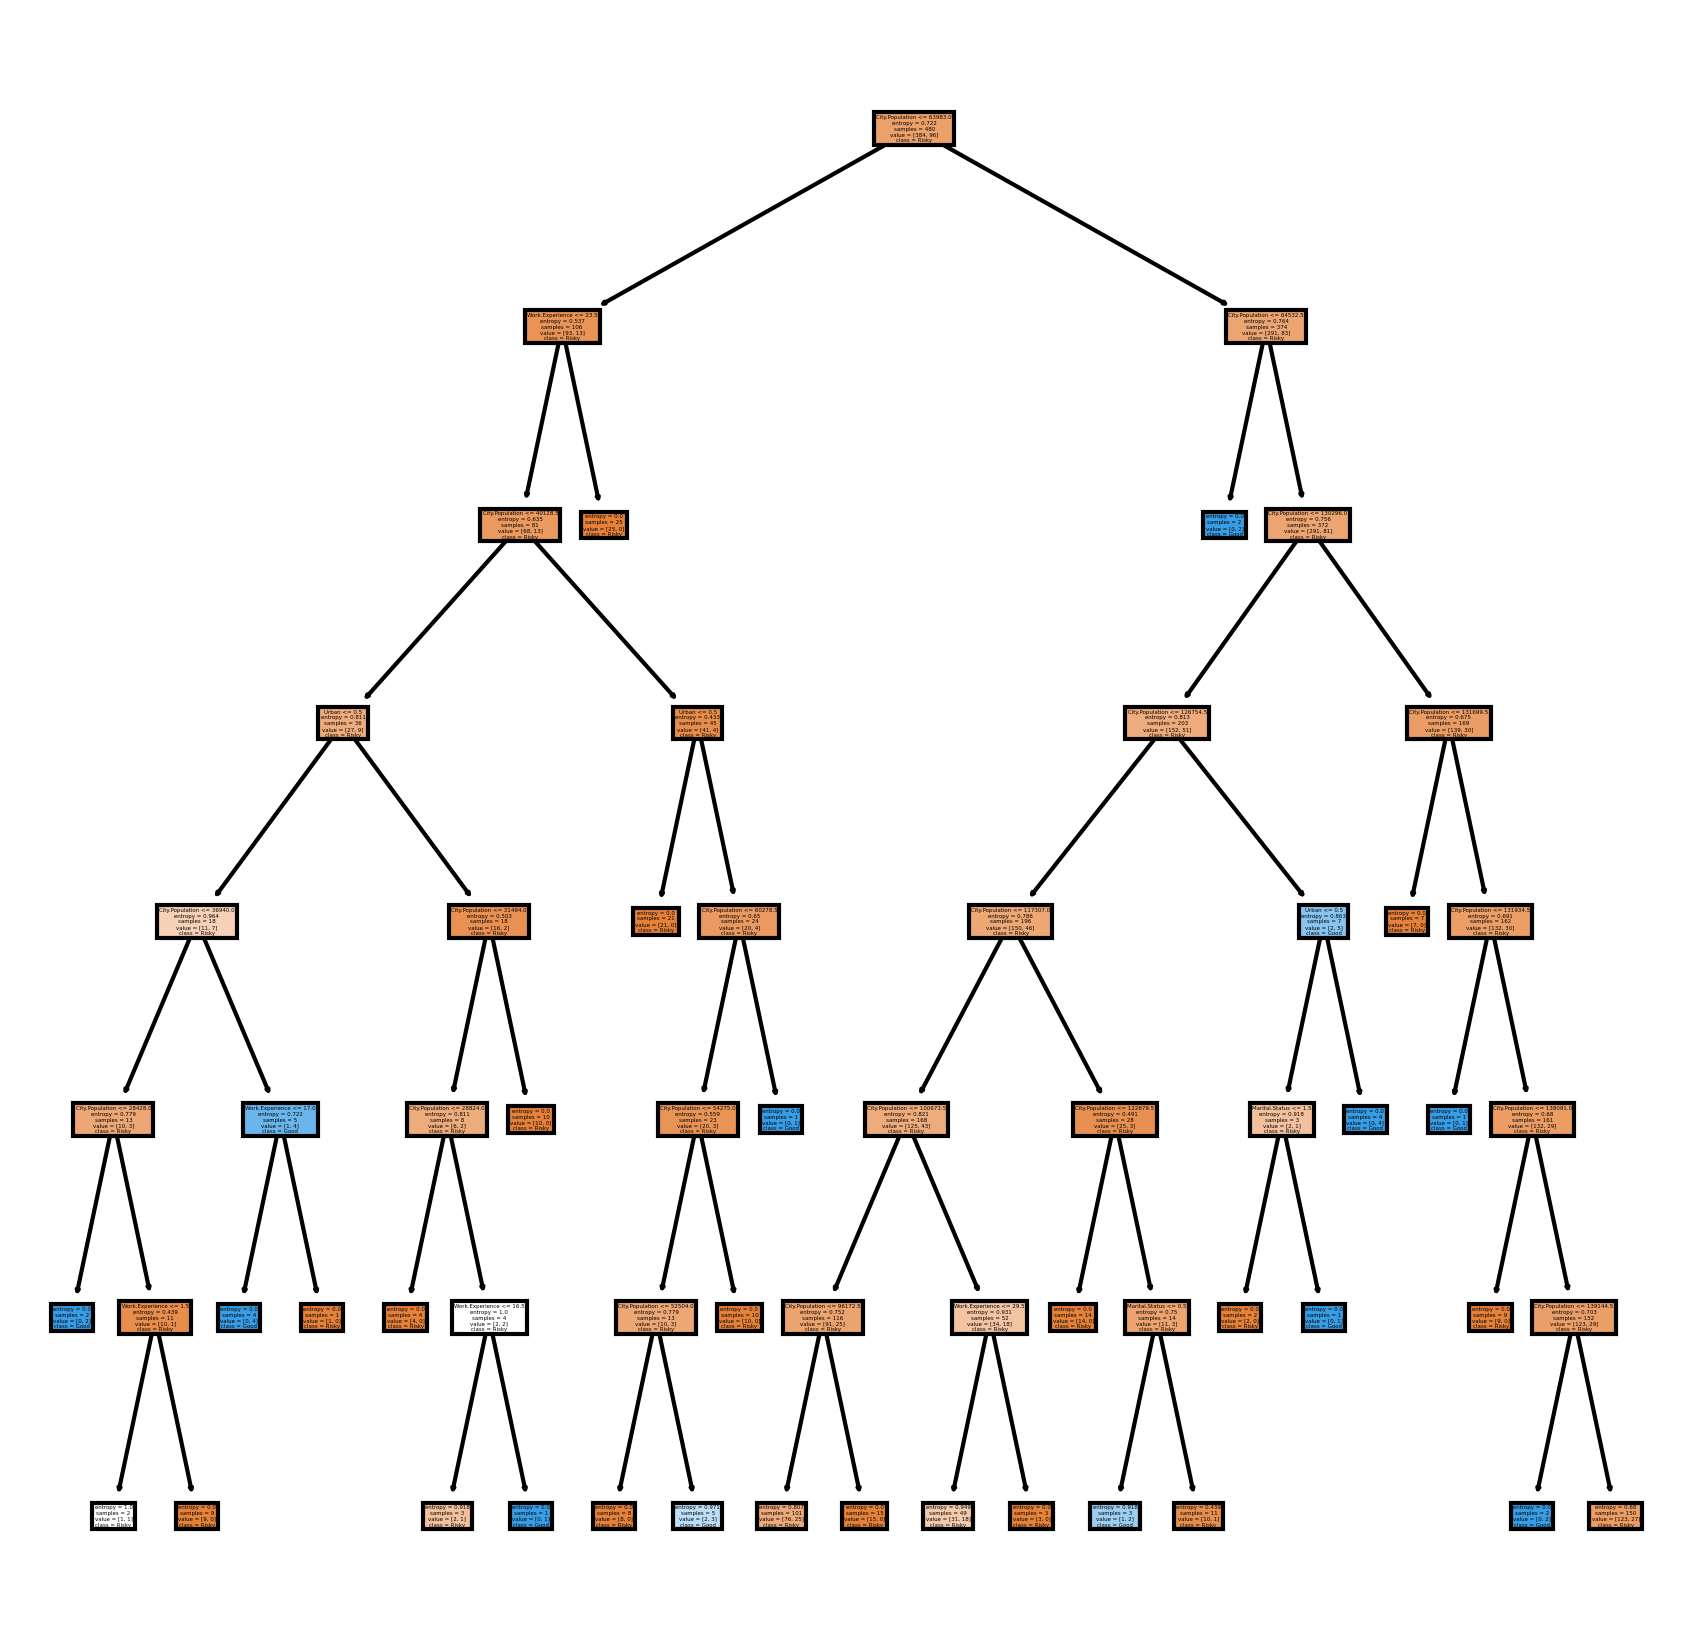

In [81]:
import matplotlib.pyplot as plt
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'] 
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(model4,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [82]:
#prediction4
preds4=model4.predict(x_test)
np.mean(preds4==y_test_array) 

0.74

In [ ]:
#Model 5 - CART with Gini Impurity with default Depth

In [83]:
model_gini = DecisionTreeClassifier(criterion='gini') 

In [101]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

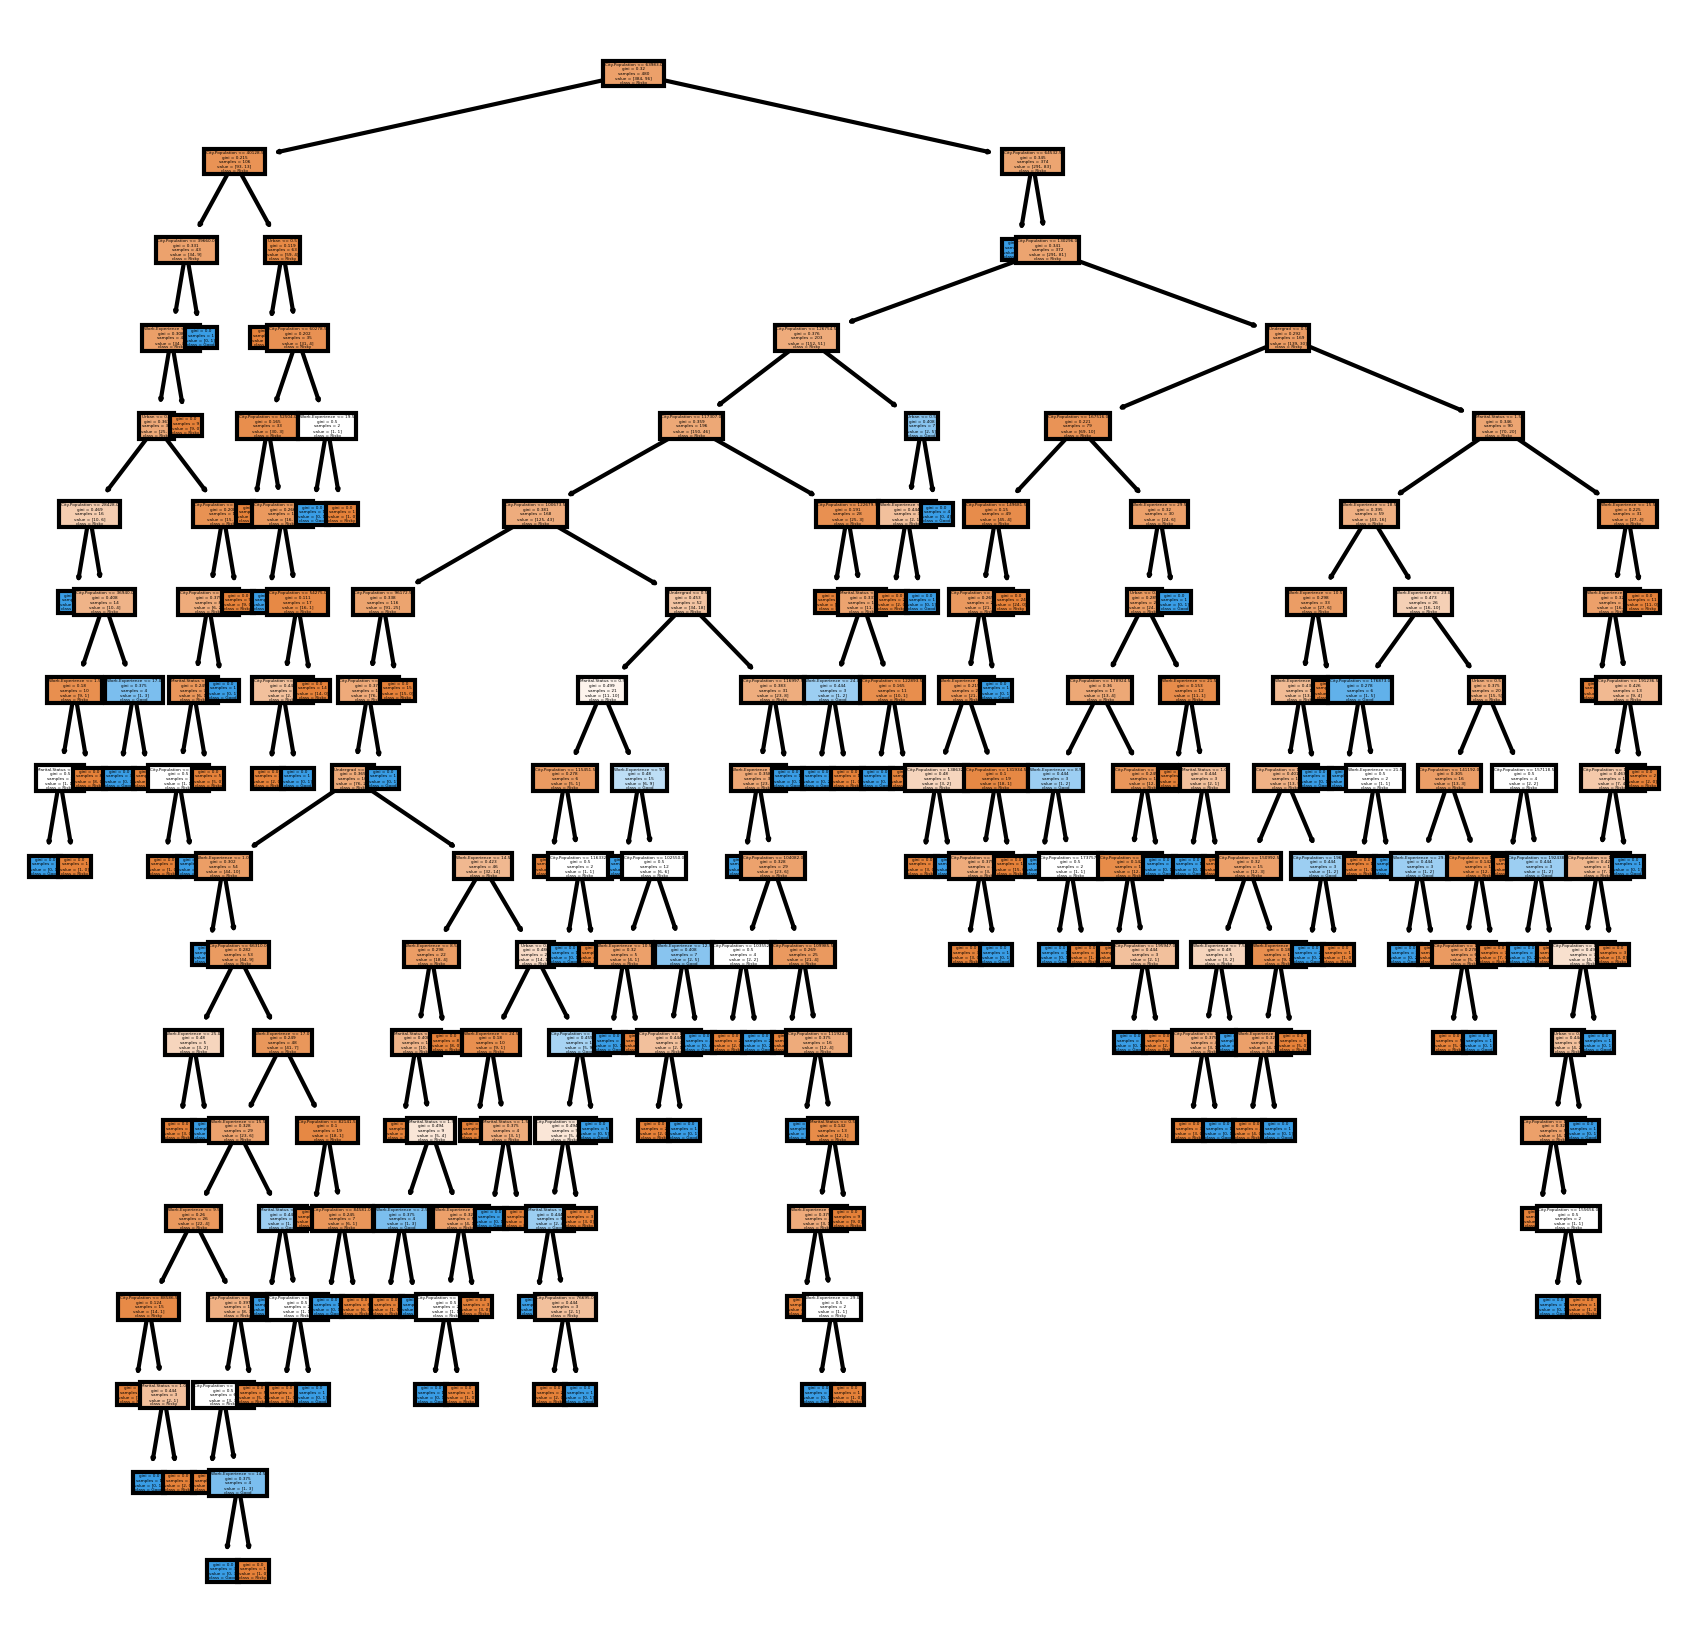

In [102]:
import matplotlib.pyplot as plt
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'] 
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [84]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [85]:
#prediction5
preds5=model_gini.predict(x_test)
np.mean(preds5==y_test_array) 

0.6511111111111111

In [ ]:
#Model 6 - CART with Gini Impurity with max depth = 4

In [87]:
model_gini6 = DecisionTreeClassifier(criterion='gini',max_depth=4) 

In [89]:
model_gini6.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

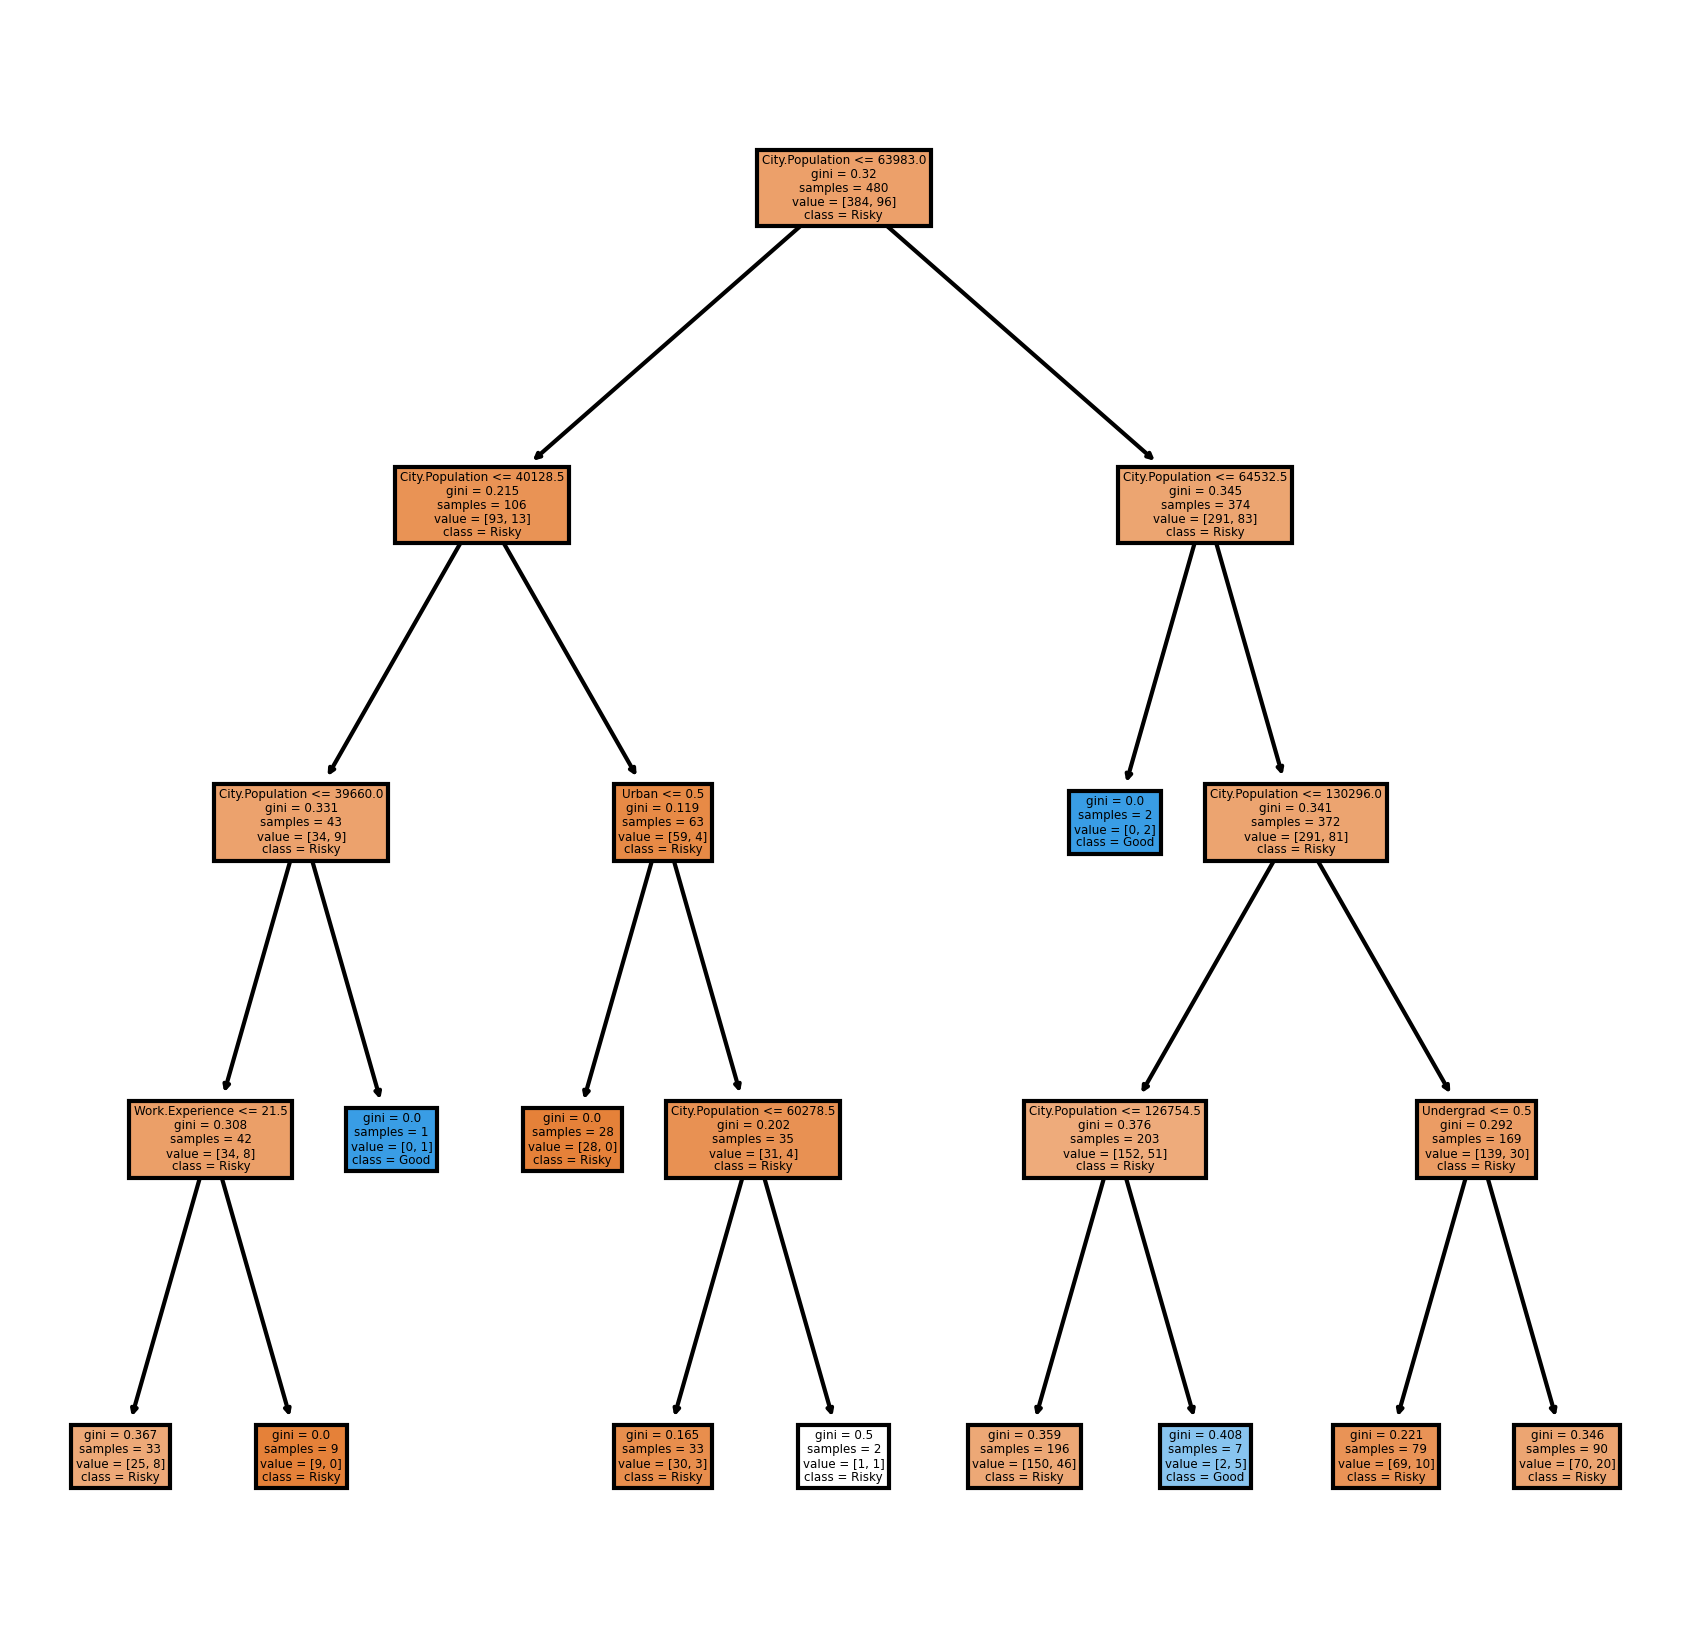

In [90]:
import matplotlib.pyplot as plt
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'] 
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(model_gini6,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [91]:
#prediction6
preds6=model_gini6.predict(x_test)
np.mean(preds6==y_test_array) 

0.7488888888888889

In [ ]:
#Model 7 - CART with Gini Impurity with max depth = 5

In [92]:
model_gini7 = DecisionTreeClassifier(criterion='gini',max_depth=5) 

In [93]:
model_gini7.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

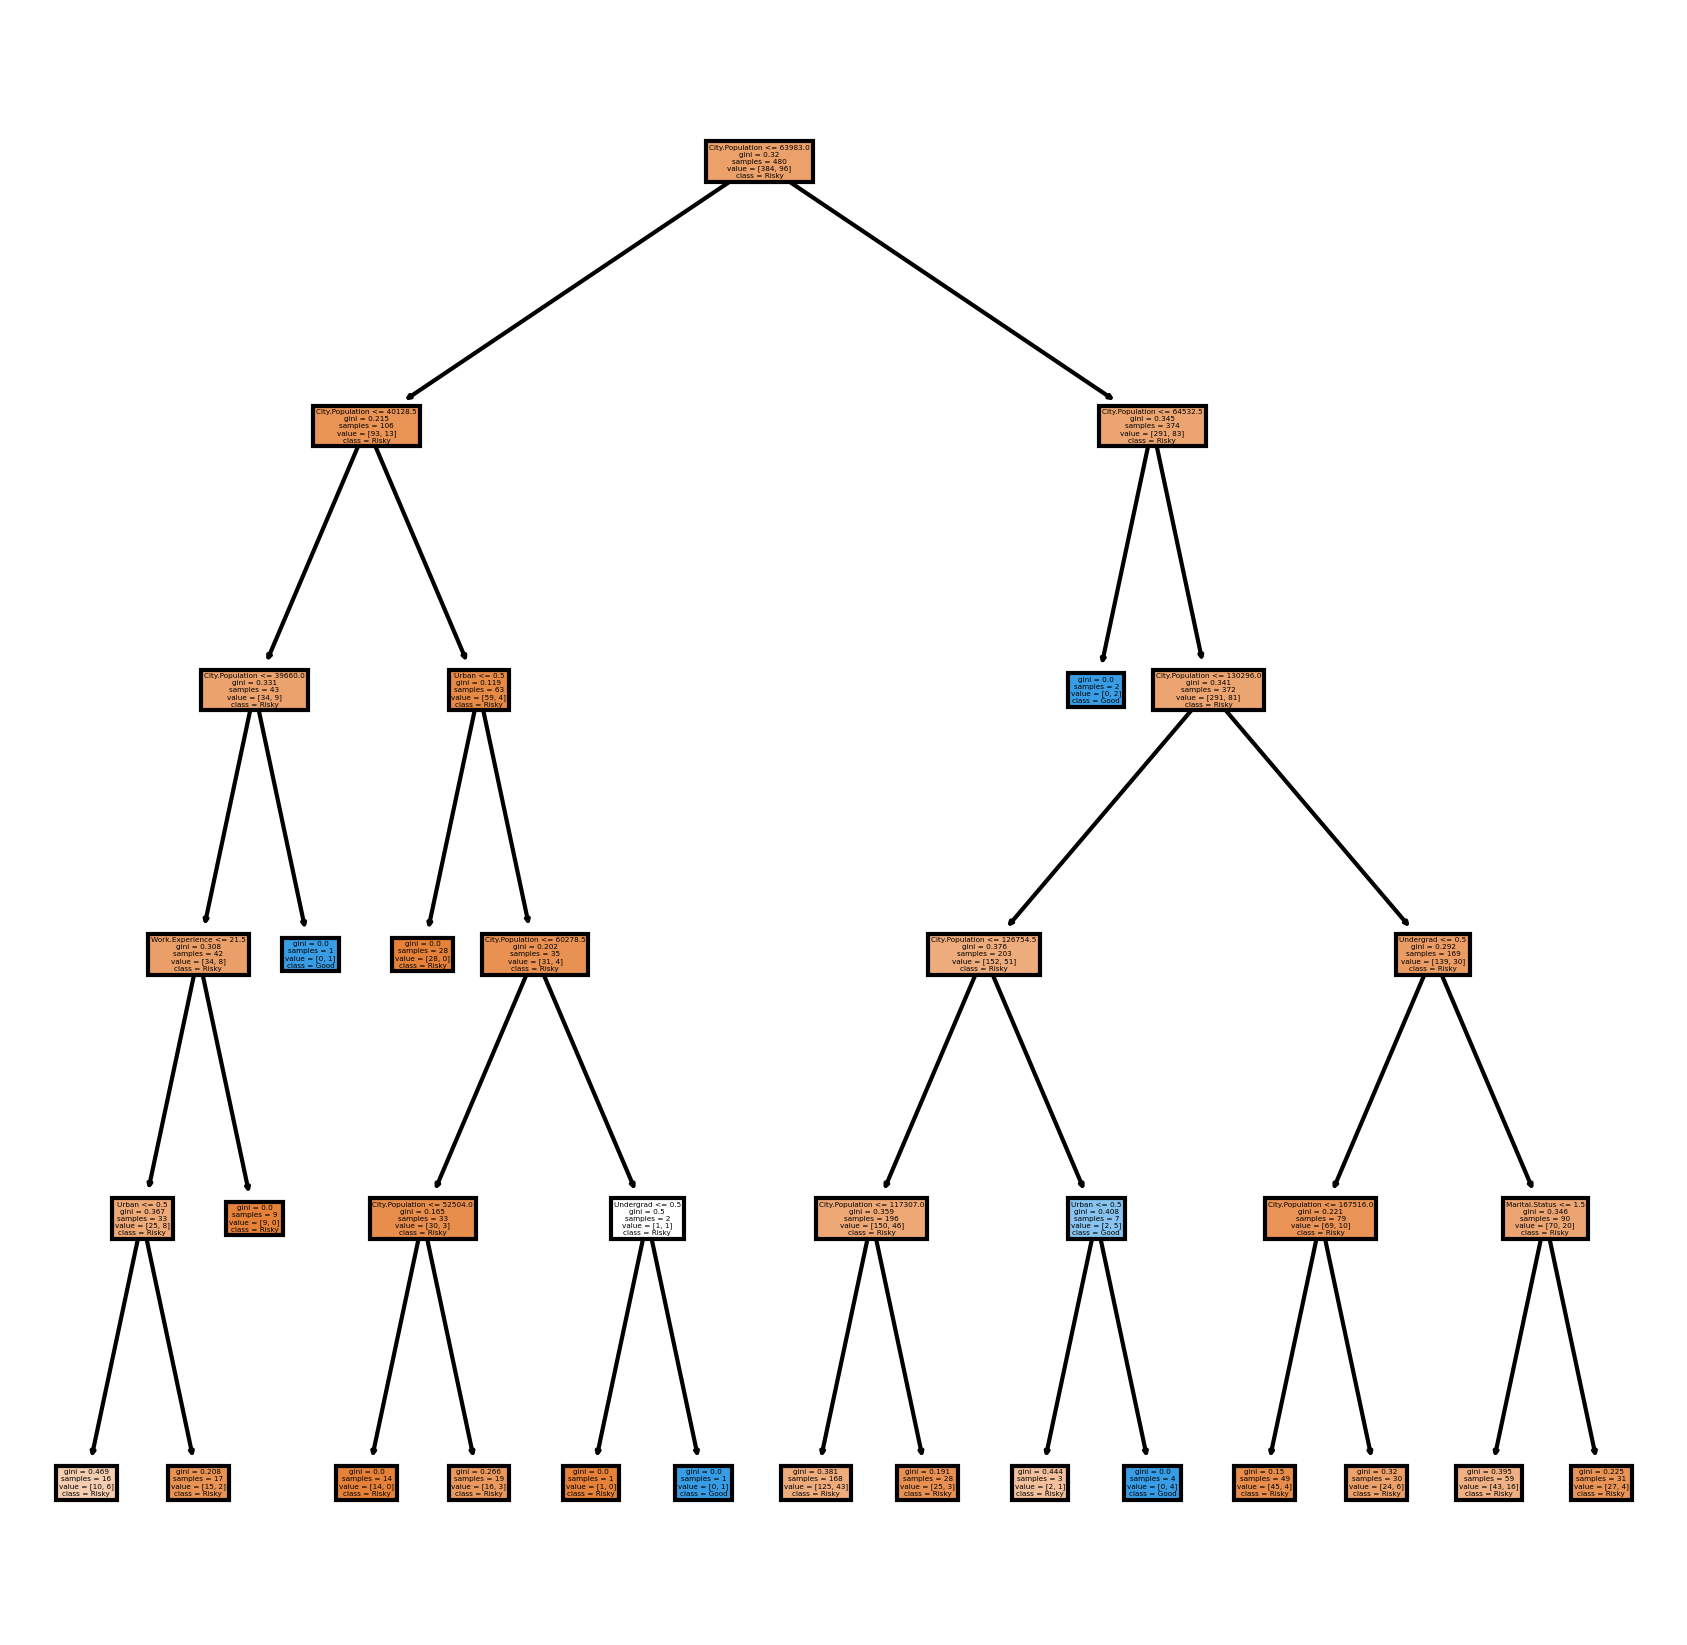

In [94]:
import matplotlib.pyplot as plt
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'] 
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(model_gini7,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [95]:
#prediction7
preds7=model_gini7.predict(x_test)
np.mean(preds7==y_test_array) 

0.7533333333333333

In [ ]:
#Model 8 - CART with Gini Impurity with max depth = 6

In [96]:
model_gini8 = DecisionTreeClassifier(criterion='gini',max_depth=6) 

In [97]:
model_gini8.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

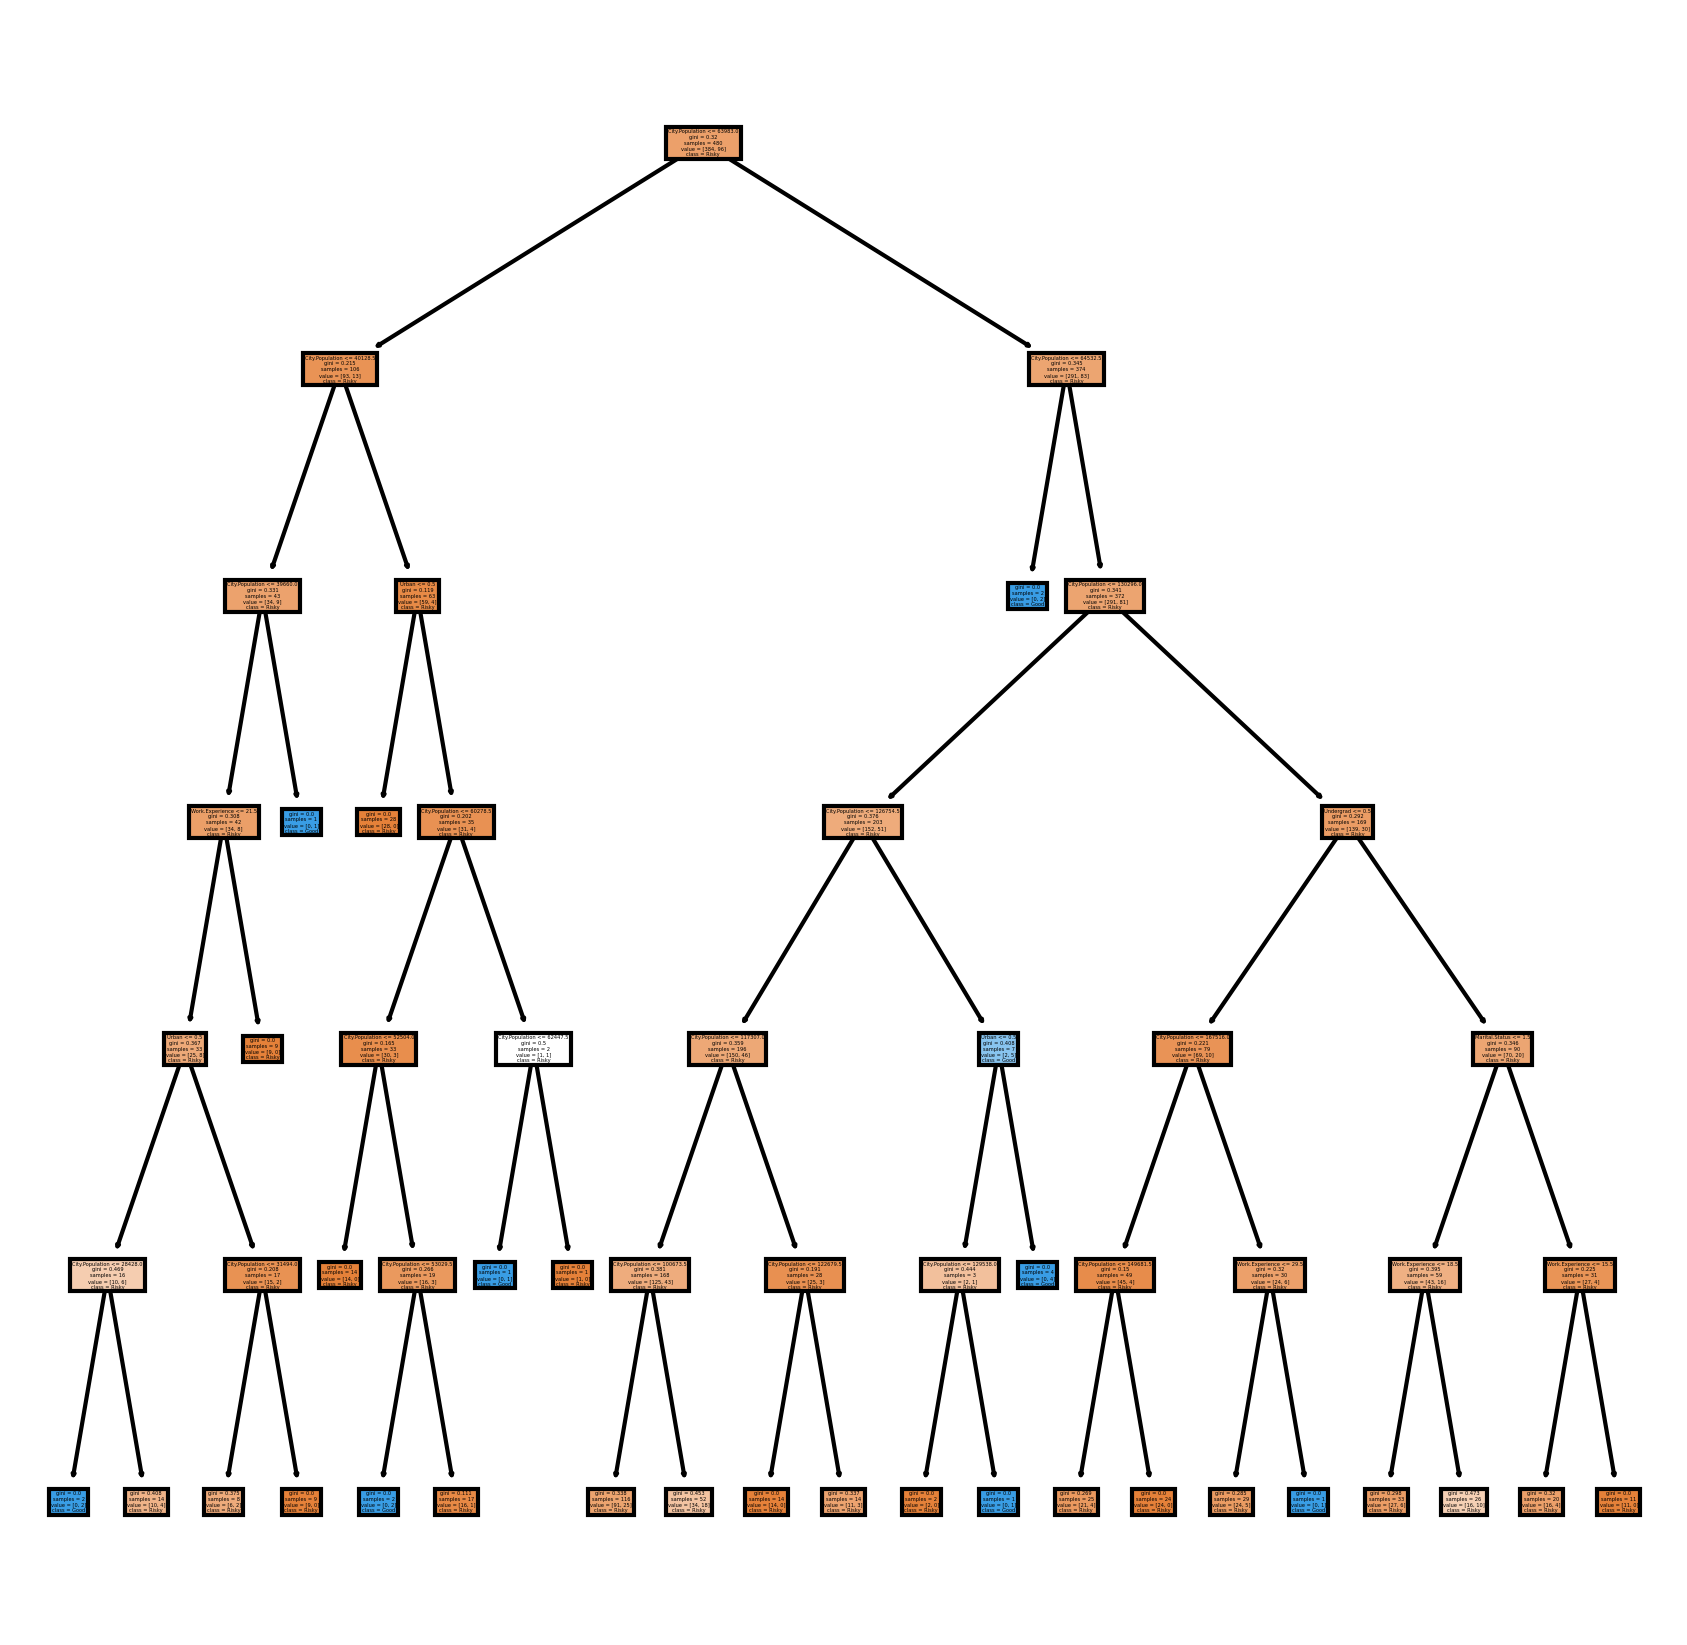

In [98]:
import matplotlib.pyplot as plt
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'] 
cn=['Risky', 'Good'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=300)
tree.plot_tree(model_gini8,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [100]:
#prediction8
preds8=model_gini8.predict(x_test)
np.mean(preds8==y_test_array) 

0.7488888888888889